In [1]:
# from google.colab import drive
# drive.mount('/content/drive')
# %cd '/content/drive/MyDrive/ColabNotebooks/Exercise5'
# import sys
# sys.path.insert(0,'/content/drive/MyDrive/ColabNotebooks/Exercise5')

import numpy as np
import matplotlib.pyplot as plt

from utils import *
from scipy.integrate import solve_ivp

In [2]:
ds = np.loadtxt('MI_timesteps.txt', skiprows=1)[1000:, 1:]

In [3]:
ds.shape

(14001, 9)

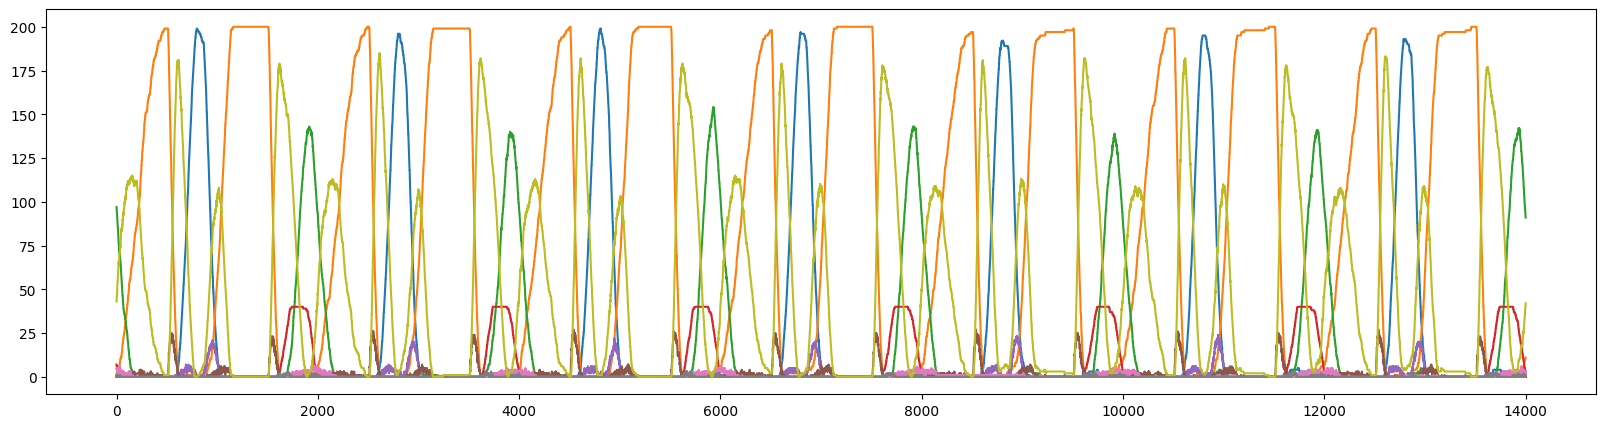

In [4]:
plt.figure(figsize=(20, 5))
for i in range(ds.shape[1]):
  plt.plot(ds[:, i])

## Time-delay embedding

In [5]:
n_windows = 10000
n_delays = 351

embed = np.zeros((n_windows, n_delays*3))
for i in range(n_windows):
  embed[i, :] = ds[i:i+n_delays, :3].ravel()

print(embed.shape)

(10000, 1053)


In [6]:
centered, mean = center_data(embed)
u, s, v = decompose_svd(centered)

In [7]:
u.shape, s.shape, v.shape

((10000, 10000), (10000, 1053), (1053, 1053))

In [8]:
r = 3
u_reduced = u[:, :r]
s_reduced = s[:r, :r]

pc = u_reduced @ s_reduced  # Representation of the state space

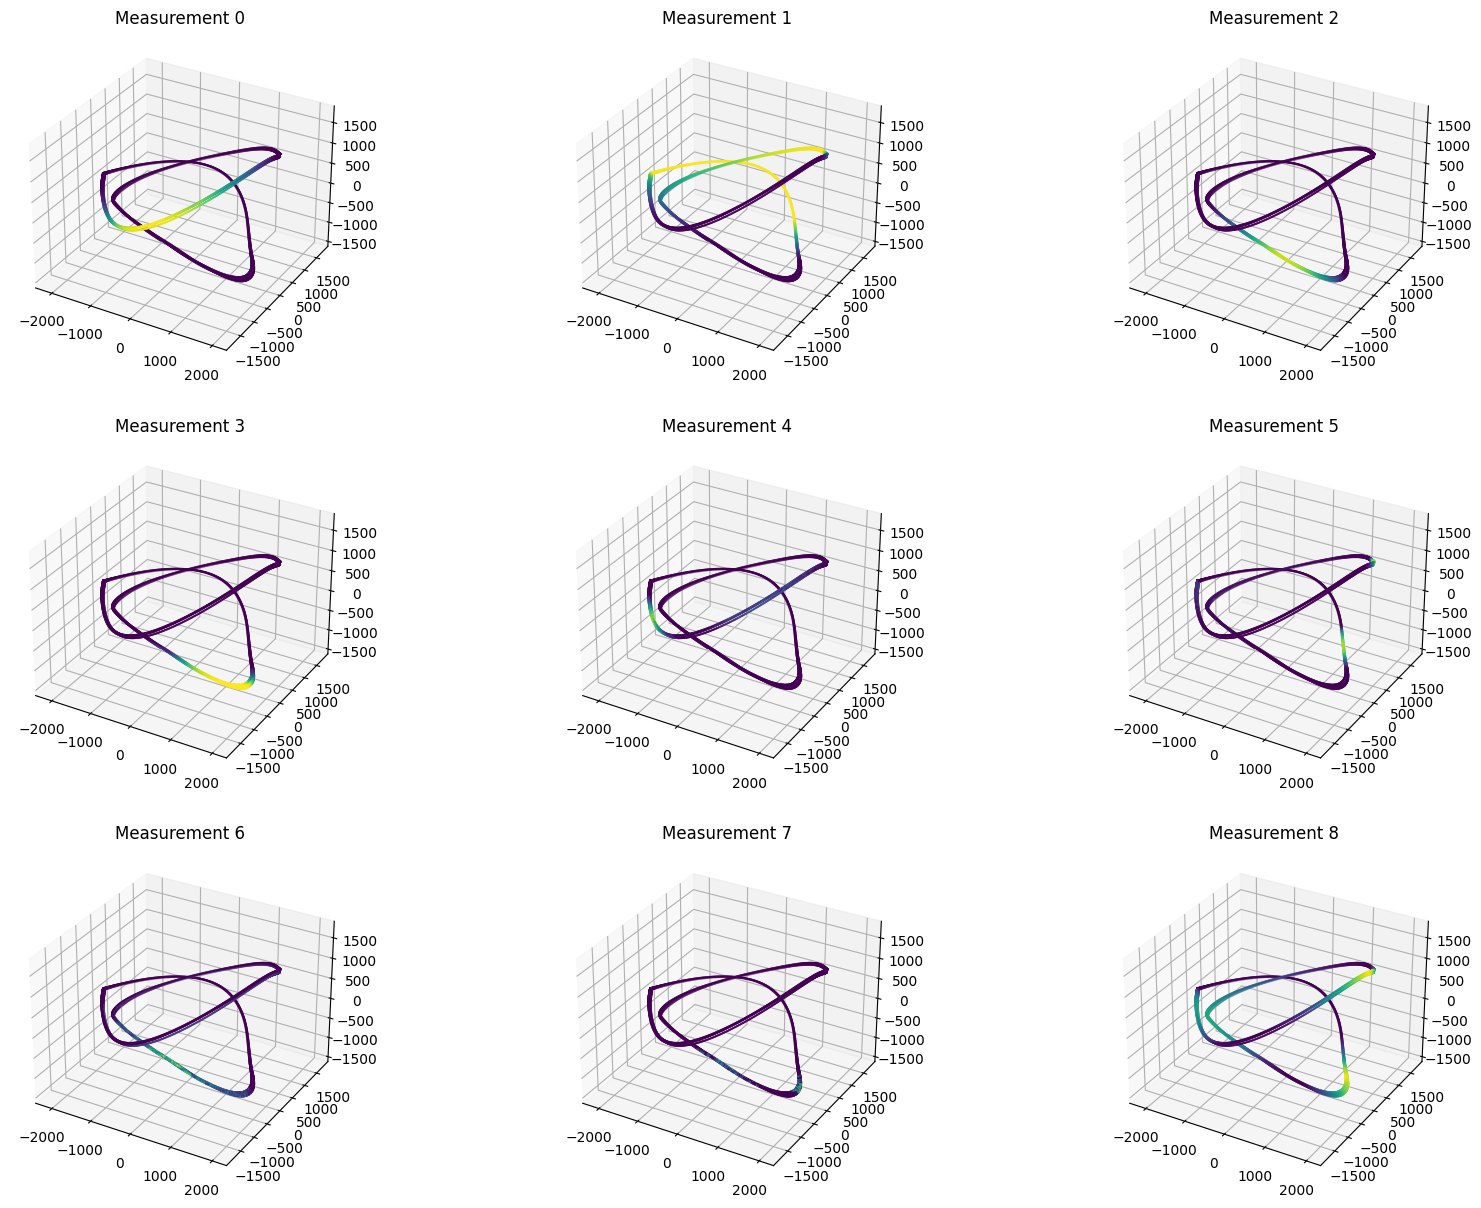

In [9]:
fig = plt.figure(figsize=(20, 15))
for i in range(9):
    ax = fig.add_subplot(3, 3, i+1, projection='3d')
    ax.scatter(pc.T[0], pc.T[1], pc.T[2], c=ds[:10000, i], s=.2)
    ax.set_title(f'Measurement {i}')
fig.savefig('figures/Ex5_Task5_PCA.png')

In [10]:
# Compute arclength over time
d_arclength = []
arclength = []
for i in range(pc.shape[0]-1):
  x0 = pc[i, :]
  x1 = pc[i+1, :]
  d_theta = np.arccos(np.dot(x0, x1)/(np.linalg.norm(x0)*np.linalg.norm(x1)))
  r = np.sqrt(x0[0]**2 + x0[1]**2 + x0[2]**2)
  angle = np.arctan2(x0[1], x0[0])
  arclength.append(angle)
  d_arclength.append(r*d_theta)

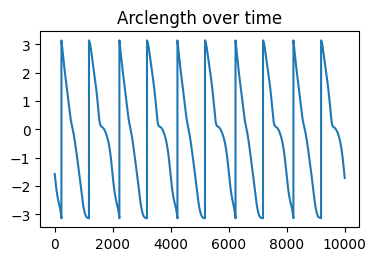

In [11]:
plt.figure(figsize=set_size(595, .5))
plt.title('Arclength over time')
plt.plot(arclength)
plt.savefig('figures/Ex5_Task5_Arclength_Time')

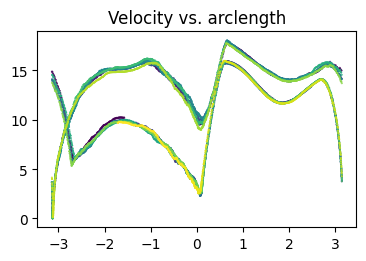

In [12]:
plt.figure(figsize=set_size(595, .5))
plt.title('Velocity vs. arclength')
plt.scatter(arclength, d_arclength, c=np.linspace(0, 1, 9999), s=.2)
plt.savefig('figures/Ex5_Task5_Velocity_Arclength')

# Integrating the arc length vector field
(Not working)

In [13]:
t0 = 0
tf = 20000
time = np.arange(tf)

xl = np.linspace(0, 2*np.pi, 17)
eps = 2*np.pi/17
centers = xl

C = get_rbf_coeffs(arclength[:-1], d_arclength[:-1], centers, eps)